In [1]:
import os
import cv2
import numpy as np
import pandas as pd
from PIL import Image

In [2]:
files_err_count = {}
files_detect_count = {}

for i in range(0, 10):
    df = pd.read_csv('predictions/prediction_%d.csv'%i)
    df = df[df['file'].str[0] == 'e']
    df['file'] = df['file'].str.split('/').str[-1]
    
    for i, row in df.iterrows():
        if row['file'] not in files_err_count:
            files_err_count[row['file']] = 0
        if row['file'] not in files_detect_count:
            files_detect_count[row['file']] = 0
        
        if row['pred'] != row['value']:
            files_err_count[row['file']] += 1
        
        files_detect_count[row['file']] += 1

In [3]:
df = pd.DataFrame({
    'file': files_detect_count.keys(),
    'err_count': files_err_count.values(),
    'detect_count': files_detect_count.values(),
})

print('All count: %d' % len(df))

All count: 68804


In [4]:
df['value'] = df['file'].str[-5]
df['correct_count'] = df['detect_count'] - df['err_count']
correct_df = df.groupby('value')['correct_count'].sum().to_frame()
correct_df.min()

correct_count    50
dtype: int64

In [5]:
print('Error count 0: %d (%f)' % (len(df[df['err_count'] == 0]), len(df[df['err_count'] == 0])/len(df)))
print('Error count 1: %d (%f)' % (len(df[df['err_count'] == 1]), len(df[df['err_count'] == 1])/len(df)))
print('Error count 2: %d (%f)' % (len(df[df['err_count'] == 2]), len(df[df['err_count'] == 2])/len(df)))
print('Error count 3: %d (%f)' % (len(df[df['err_count'] == 3]), len(df[df['err_count'] == 3])/len(df)))

Error count 0: 57064 (0.829370)
Error count 1: 5073 (0.073731)
Error count 2: 3302 (0.047991)
Error count 3: 3365 (0.048907)


### 顯示被判斷錯誤的圖片

dataset/comp-simple/43006_琳.jpg


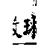

dataset/comp-simple/13235_術.jpg


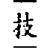

In [6]:
for file in df[df['err_count'] == 3]['file'][:2]:
    file = os.path.join('dataset/comp-simple', file)
    img = cv2.imread(file)
    print(file)
    display(Image.fromarray(img))

### Copy 被判斷錯誤的圖片

In [7]:
!rm -rf tmp
!mkdir tmp

In [8]:
for i in range(1,4):
    !mkdir tmp/{i}

In [9]:
for i in range(1,4):
    files = df[df['err_count'] == i]['file'].copy()
    files = 'dataset/comp-simple/' + files
    !cp {' '.join(files)} tmp/{i}

In [11]:
!rm -rf tmp